# Sprite Sales Analysis
Sprite is undeniably a quality product, yet it has yet to fully realize its potential and secure a significant portion of the beverage market. Therefore, this analysis aims to uncover the barriers hindering its market penetration and develop strategies to enhance its market share.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### `Sprite yearly sales (VS) Total yearly sales of Beverages `

In [2]:
df = pd.read_csv("BeverageSales.csv")

In [3]:
df

,SrNo,TransactionDate,RetailerId,RetailerName,State,City,Lat,Long,ProductItemID,Category,...,SalesChannel,ChannelType,OrderQty,OrderQty_N,SalesValue,Discount,Country,CostPerUnit,MarginPercentage,Profit
0,1,26/08/2020,376,Kiwi Corner Creations,Canterbury,Christchurch,-43.5321,172.6362,65,Cold Bewerages,...,E-Commerce,Online,254,254,34290,10,New Zealand,128,0.15,1905
1,2,09/06/2021,324,Krabi Craftsmarket,Krabi,Ao Nang,8.0376,98.8150,24,Cold Bewerages,...,Vending Machines,D2C,80,80,4560,5,Thailand,48,0.20,720
2,3,14/06/2020,335,Ha Long Bay Haven Finds,Quang Ninh,Ha Long,20.9517,107.0894,124,Cold Bewerages,...,Airline and Travel Catering,D2C,108,108,4471,8,Vietnam,38,0.15,340
3,4,03/08/2019,578,Belait Boutique Finds,Belait,Kuala Belait,4.5841,114.1994,14,Cold Bewerages,...,Vending Machines,D2C,494,494,40014,10,Brunei,77,0.15,2223
4,5,02/12/2022,620,Surabaya Souvenirs,East Java,Surabaya,-7.2575,112.7521,137,Cold Bewerages,...,Club and Mass Merchandisers,Modern Trade,108,108,14904,8,Indonesia,128,0.15,1134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24991,17/02/2019,577,Inle Lake Inspirations,Shan,Nyaungshwe,20.6566,96.9353,3,Cold Bewerages,...,Club and Mass Merchandisers,Modern Trade,300,300,13500,10,Myanmar,40,0.20,1500
24996,24995,26/12/2019,577,Inle Lake Inspirations,Shan,Nyaungshwe,20.6566,96.9353,85,Cold Bewerages,...,Retail Stores,General Trade,82,82,1948,5,Myanmar,21,0.15,205
24997,24996,15/01/2022,298,Belait Boutique Finds,Belait,Kuala Belait,4.5841,114.1994,108,Cold Bewerages,...,Event Sponsorship and Marketing Tie-Ins,D2C,42,42,2520,0,Brunei,54,0.10,252
24998,24997,03/04/2022,621,Singapore Silk Treasures,Singapore,Singapore,1.2844,103.8454,114,Cold Bewerages,...,Wholesale Distributors,General Trade,92,92,5244,5,Singapore,48,0.20,828


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SrNo                 25000 non-null  int64  
 1   TransactionDate      25000 non-null  object 
 2   RetailerId           25000 non-null  int64  
 3   RetailerName         25000 non-null  object 
 4   State                25000 non-null  object 
 5   City                 25000 non-null  object 
 6   Lat                  25000 non-null  float64
 7   Long                 25000 non-null  float64
 8   ProductItemID        25000 non-null  int64  
 9   Category             25000 non-null  object 
 10  Brand                25000 non-null  object 
 11  Product              25000 non-null  object 
 12  PackagingType        25000 non-null  object 
 13  PackagingQty         25000 non-null  object 
 14  PackagingCategory    25000 non-null  object 
 15  PackagingQty_N_ml    25000 non-null 

In [5]:
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])

C:\Users\AGA Computer\AppData\Local\Temp\ipykernel_1516\2640890146.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])


In [6]:
df["year"] = df["TransactionDate"].dt.year
df["year"]

0        2020
1        2021
2        2020
3        2019
4        2022
         ... 
24995    2019
24996    2019
24997    2022
24998    2022
24999    2019
Name: year, Length: 25000, dtype: int32

In [7]:
yearly_sales = df.groupby("year")["SalesValue"].sum()
yearly_sales

year
2019    90525808
2020    91669876
2021    89851914
2022    87027298
2023     7335003
Name: SalesValue, dtype: int64

In [8]:
sprite_ys = (df.groupby(["year","Brand"])["SalesValue"].sum()).loc[:, "Sprite"]
sprite_ys

year
2019    8440518
2020    7836648
2021    7789445
2022    7771588
2023     659250
Name: SalesValue, dtype: int64

In [9]:
sprite_sales_perc = (sprite_ys / yearly_sales) * 100
sprite_sales_perc

year
2019    9.323880
2020    8.548771
2021    8.669203
2022    8.930058
2023    8.987726
Name: SalesValue, dtype: float64

In [10]:
def alphanumeric_units(num):
    if num>=1e9:
        return f'{num/1e9:.0f}B'
    elif num>=1e6:
        return f'{num/1e6:.0f}M'
    elif num>=1e3:
        return f'{num/1e3:.0f}K'
    else:
        return f'{num:.0f}'

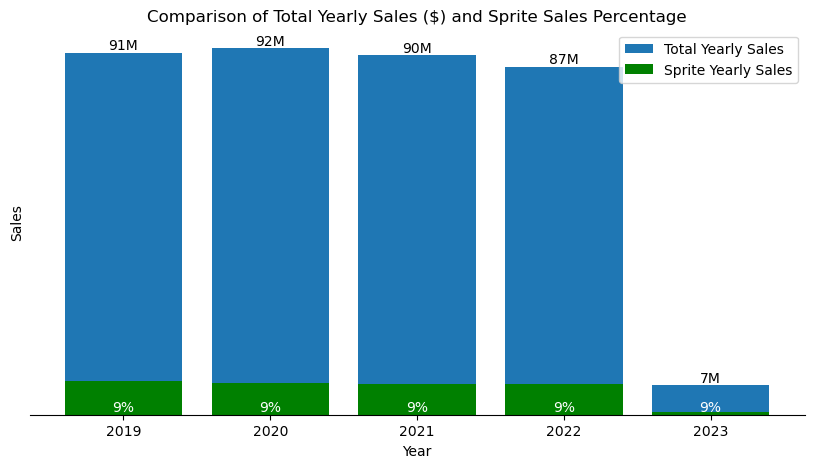

In [11]:
plt.figure(figsize=(10, 5))

# Plot total yearly sales
plt.bar(yearly_sales.index, yearly_sales.values, label='Total Yearly Sales')

# Plot Sprite sales as shaded area on top of total sales
plt.bar(sprite_sales_perc.index, sprite_ys.values, label='Sprite Yearly Sales', color='green')

# Add text labels for Sprite sales percentages
for i, percentage in enumerate(sprite_sales_perc):
    plt.text(sprite_sales_perc.index[i], sprite_sales_perc.values[i], f'{percentage:.0f}%', ha='center', va='bottom',color='white')

# Add text labels for total yearly sales
for i, sales in enumerate(yearly_sales):
    plt.text(yearly_sales.index[i], yearly_sales.values[i], alphanumeric_units(sales), ha='center', va='bottom')


#removing spines
for i in ["top","right","left"]:
    plt.gca().spines[i].set_visible(False)

plt.xlabel('Year')
plt.ylabel('Sales')
plt.yticks([])
plt.title('Comparison of Total Yearly Sales ($) and Sprite Sales Percentage')
plt.legend()
plt.show()

#### Insight
In 2023, the beverage market experienced a decline. Despite robust sales in preceding years, Sprite's portion of the market remained consistent at 8 to 9 percent, indicating stagnation without signs of growth.

## `Top 10 countries by sales and Sprite's share` 
Let's explore new markets for our product and assess its performance on a country-by-country basis. This analysis will guide us in determining where to focus our marketing campaigns effectively.

In [12]:
country_sales = (df.groupby("Country")["SalesValue"].sum()).sort_values(ascending = False)[:10]
country_sales

Country
India            83971956
 Australia       28956153
 Philippines     28936590
 Brunei          28754511
Myanmar          28659710
 New Zealand     27896882
 Indonesia       27754741
 Vietnam         27733122
 Malaysia        27366670
 Thailand        22780626
Name: SalesValue, dtype: int64

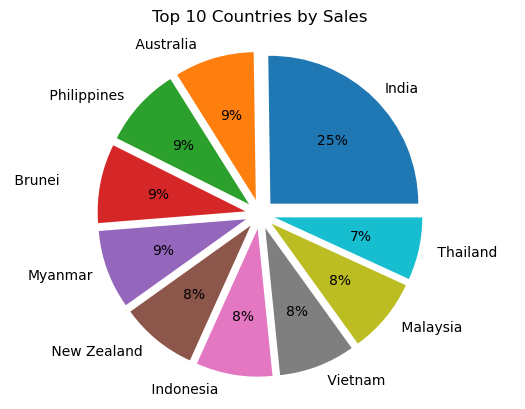

In [13]:
# Data for graph
countries = country_sales.index
counts = country_sales.values
percentages = [(value / np.sum(counts))*100 for value in counts]
# Plotting Data
plt.pie(percentages, labels = countries, autopct= '%1.0f%%',explode = [0.1] * 10)

plt.title('Top 10 Countries by Sales')
plt.show()

In [14]:
avg_c_order = (df.groupby("Country")["OrderQty_N"].mean()).sort_values(ascending = False)[:10]
avg_c_order

Country
Myanmar          257.218799
 Thailand        256.903574
 Philippines     256.242488
India            253.527184
 Australia       253.361353
 Singapore       252.764138
 New Zealand     251.805282
 Vietnam         251.713396
 Cambodia        251.235602
 Brunei          251.124559
Name: OrderQty_N, dtype: float64

In [15]:
avg_c_order = (round(avg_c_order,0)).astype(int)
avg_c_order

Country
Myanmar          257
 Thailand        257
 Philippines     256
India            254
 Australia       253
 Singapore       253
 New Zealand     252
 Vietnam         252
 Cambodia        251
 Brunei          251
Name: OrderQty_N, dtype: int32

C:\Users\AGA Computer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


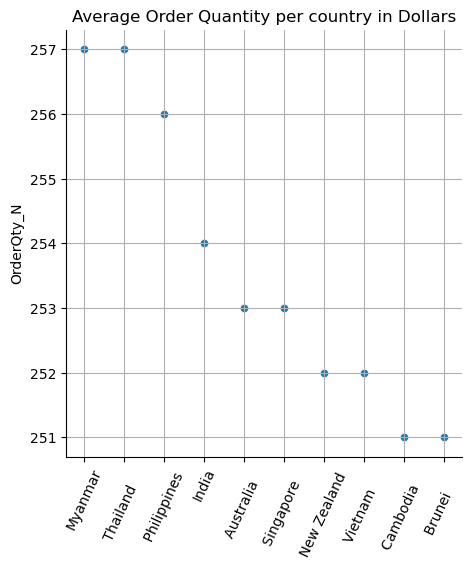

In [53]:
xt = list(avg_c_order.index)
sns.relplot(x=xt,y=avg_c_order)
plt.xlabel('')
plt.xticks(rotation=65)
plt.grid(True)
plt.title("Average Order Quantity per country in Dollars")

plt.show()

In [17]:
sprite_cs = ((df.groupby(["Country","Brand"])["SalesValue"].sum()).sort_values(ascending = False)).loc[:, "Sprite"][:10]
sprite_cs

Country
India            7030389
 Brunei          2859996
 Vietnam         2858699
 New Zealand     2511308
 Philippines     2461104
Myanmar          2460893
 Malaysia        2451976
 Australia       2325063
 Indonesia       2303521
 Singapore       2261760
Name: SalesValue, dtype: int64

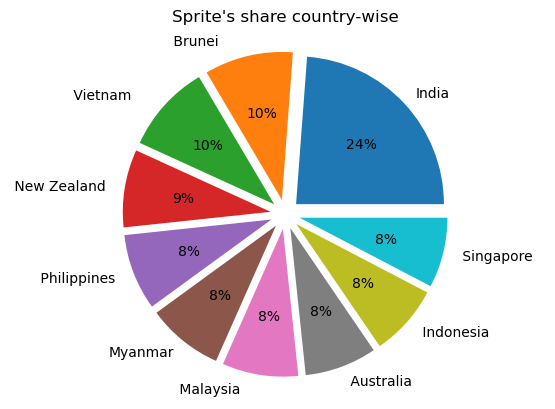

In [18]:
# Data for graph
countries = sprite_cs.index
counts = sprite_cs.values
percentages = [(value / np.sum(counts))*100 for value in counts]
# Plotting Data
plt.pie(percentages, labels = countries, autopct= '%1.0f%%',explode = [0.1] * 10)

plt.title("Sprite's share country-wise")
plt.show()

#### Insights
Sprite demonstrates excellent performance in India. However, to maximize sales and capture a larger market share in the given other countries, marketing campaigns must be approved and implemented effectively, especially for Myanmar, Thailand & Philiphines.

### `Sales Channel Effectiveness`
Now, that we have analyzed geographic market share. Let's find out other metrics to enchance sales such as sales channel effectiveness.

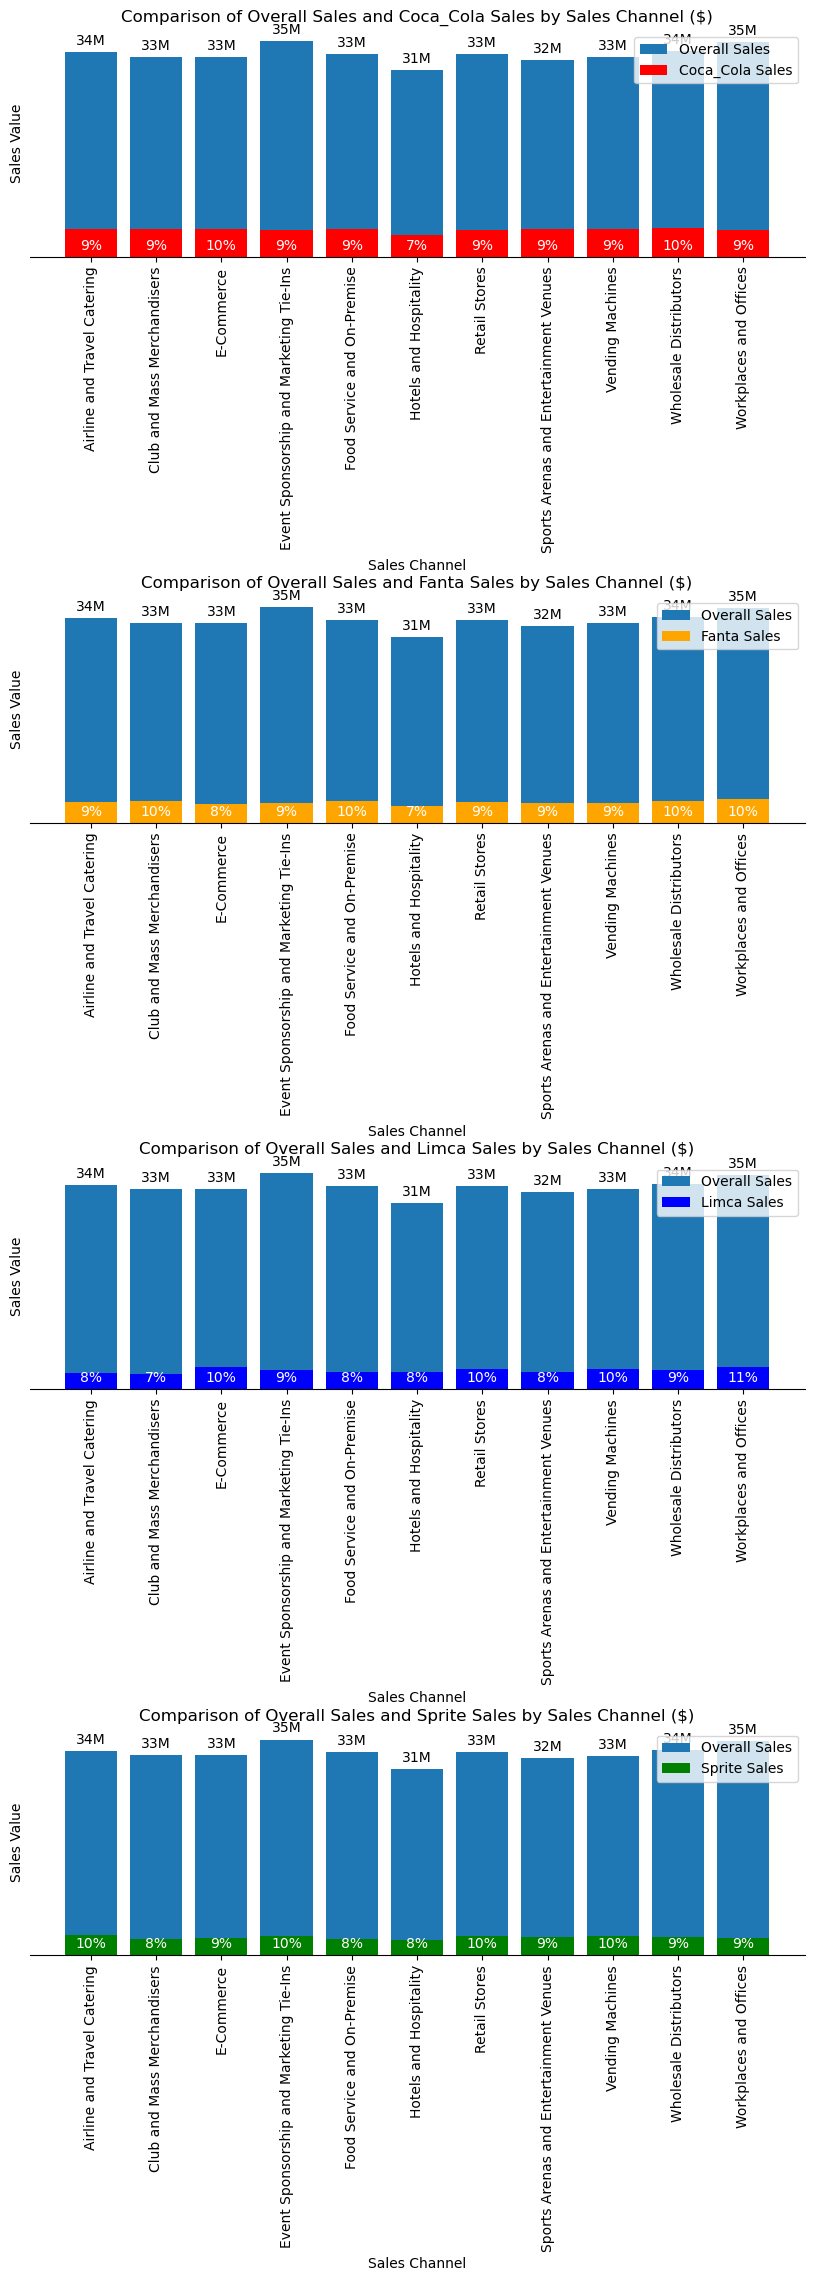

In [44]:
brands = ['Coca_Cola', 'Fanta', 'Limca', 'Sprite']
brand_colors = {'Coca_Cola': 'red', 'Fanta': 'orange', 'Limca': 'blue', 'Sprite': 'green'}

fig, axs = plt.subplots(4, 1, figsize=(10, 25))
fig.subplots_adjust(hspace=1.5)

for i, brand in enumerate(brands):
    # Filter data for the current brand
    brand_sales = df[df['Brand'] == brand]
    overall_sales = df
    
    # Group data by SalesChannel
    brand_sales_grouped = brand_sales.groupby('SalesChannel').agg({'SalesValue': 'sum'})
    overall_sales_grouped = overall_sales.groupby('SalesChannel').agg({'SalesValue': 'sum'})
    
    # Plot the data
    ax = axs[i]
    overall_bars = ax.bar(overall_sales_grouped.index, overall_sales_grouped['SalesValue'], label='Overall Sales')
    brand_bars = ax.bar(brand_sales_grouped.index, brand_sales_grouped['SalesValue'], label=f'{brand} Sales', color=brand_colors[brand])
    
    # Add labels and title
    ax.set_xlabel('Sales Channel')
    ax.set_ylabel('Sales Value')
    ax.set_title(f'Comparison of Overall Sales and {brand} Sales by Sales Channel ($)', usetex=False)
    ax.tick_params(axis='x', rotation=90)
    
    # Add text annotations above blue bars with alphanumeric units
    for bar in overall_bars:
        height = bar.get_height()
        ax.annotate(alphanumeric_units(height), xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    
    # Add percentage annotations 
    for bar in brand_bars:
        height = bar.get_height()
        percentage = height / sum(brand_sales_grouped['SalesValue']) * 100
        ax.annotate(f'{percentage:.0f}%', xy=(bar.get_x() + bar.get_width() / 2, 0),
                     xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', color='white')
    
    # Removing spines
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.yaxis.set_ticks([])
    
    ax.legend()

plt.show()

#### Insights
The analysis of sales channels for both Overall Sales and Sprite Sales, alongside its competitor, indicates that Sprite is leveraging its sales channels as effectively as other brands. Which is a good for enhancing Sprite's market presence. 

## `Total Sales vs. Average Cost per Unit`
Another vital metric to consider is the cost per unit. Therefore, it's essential to examine whether the average cost per unit is low and if Sprite is achieving high sales. This analysis allows for a competitive pricing assessment, potentially leading to higher profit margins and increased price flexibility for Sprite.

In [20]:
df["SalesValue"].corr(df["CostPerUnit"])

0.7069515713916433

In [21]:
avg_cost_brand = round((df.groupby('Brand')['CostPerUnit'].mean()),2).sort_values(ascending=False)
avg_cost_brand

Brand
Costa Coffee           132.00
Georgia                132.00
Kinley                 114.27
Minute Maid             63.59
RimZim                  53.69
Kinley Soda             50.34
Thums Up                48.22
Smartwater              48.00
Limca                   47.44
Charged by Thums Up     45.75
Sprite                  45.49
Fanta                   44.65
Coca_Cola               44.48
Maaza                   37.67
Schweppes               26.00
Honest Tea              21.00
Name: CostPerUnit, dtype: float64

In [22]:
total_sales_per_brand = (df.groupby('Brand')['SalesValue'].sum()).sort_values(ascending=False)
total_sales_per_brand

Brand
Coca_Cola              48527482
Georgia                38211962
Fanta                  37241956
Limca                  33822917
Sprite                 32497449
RimZim                 27559545
Costa Coffee           27098336
Kinley                 25212764
Maaza                  24554173
Minute Maid            22902910
Thums Up               19452942
Kinley Soda            15075800
Schweppes               5672327
Charged by Thums Up     4042734
Smartwater              2520637
Honest Tea              2015965
Name: SalesValue, dtype: int64

In [24]:
cost_df = pd.DataFrame(avg_cost_brand)
sales_df = pd.DataFrame(total_sales_per_brand)

In [27]:
merged_df = pd.merge(cost_df, sales_df, on='Brand')

In [28]:
merged_df

,CostPerUnit,SalesValue
Brand,,
Costa Coffee,132.00,27098336
Georgia,132.00,38211962
Kinley,114.27,25212764
Minute Maid,63.59,22902910
RimZim,53.69,27559545
Kinley Soda,50.34,15075800
Thums Up,48.22,19452942
Smartwater,48.00,2520637
Limca,47.44,33822917


In [35]:
merged_df.iloc[:,0].index

Index(['Costa Coffee', 'Georgia', 'Kinley', 'Minute Maid', 'RimZim',
       'Kinley Soda', 'Thums Up', 'Smartwater', 'Limca', 'Charged by Thums Up',
       'Sprite', 'Fanta', 'Coca_Cola', 'Maaza', 'Schweppes', 'Honest Tea'],
      dtype='object', name='Brand')

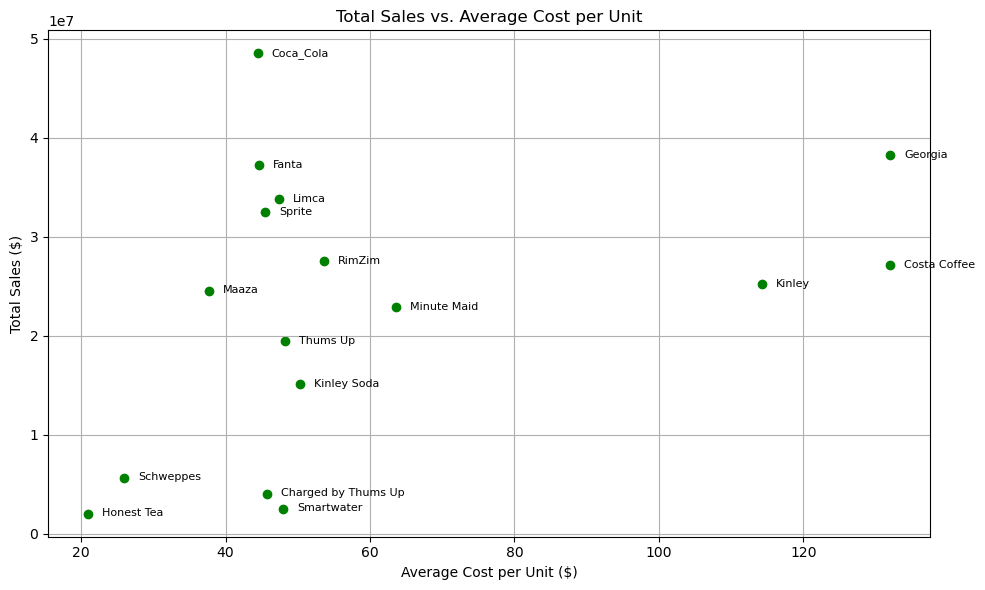

In [39]:
# Plotting as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['CostPerUnit'], merged_df['SalesValue'], color='green')

# Adding labels for each point
for i, brand in enumerate(merged_df.iloc[:,0].index):
    plt.annotate(brand, (merged_df['CostPerUnit'].iloc[i], merged_df['SalesValue'].iloc[i]), xytext=(10, -2), textcoords='offset points', fontsize=8)

plt.title('Total Sales vs. Average Cost per Unit')
plt.xlabel('Average Cost per Unit ($)')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Insights
Sprite's sales volume is reasonably high, with an average quantity per sale that's relatively low, which bodes well.

## `Sales Performance of Top 10 Brands by Packaging Type`
Analyzing the impact of packaging types on beverage sales is essential, as it directly influences consumer choices. By comparing with other brands, we can gain insights into how various packaging options affect market share.

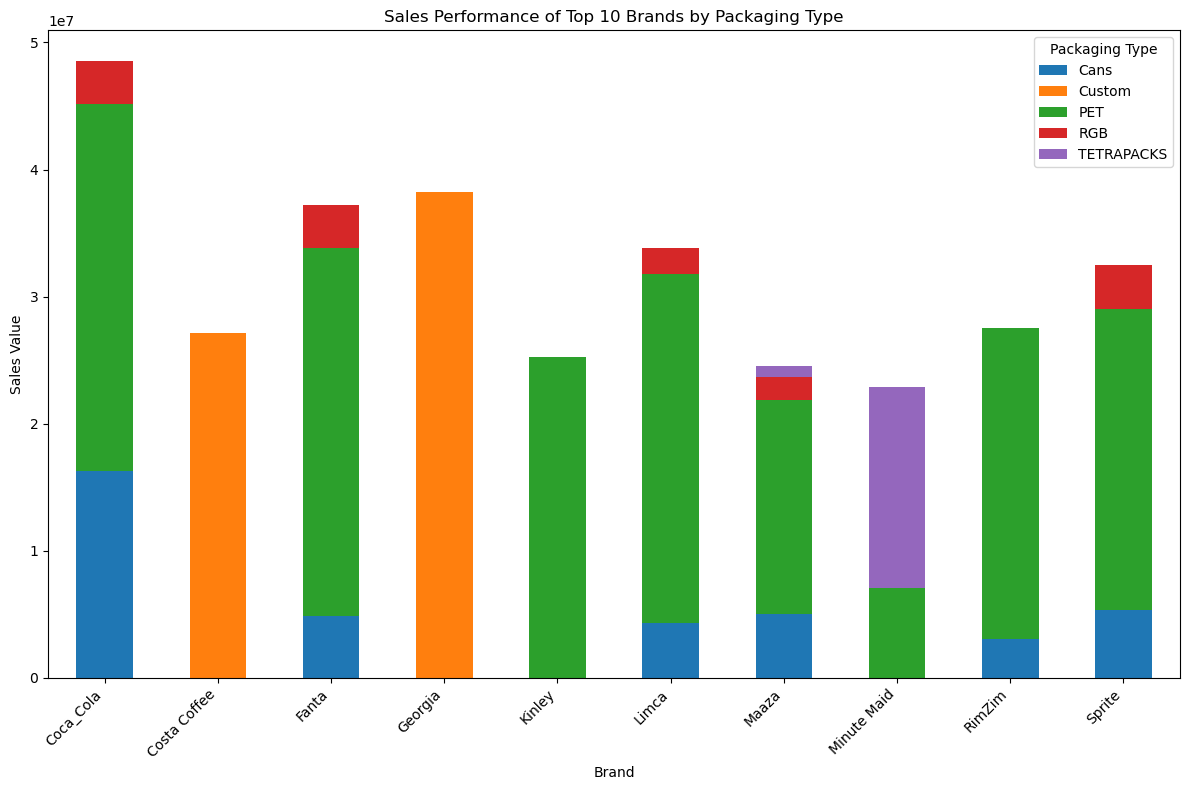

In [50]:
# Calculate total sales for each brand
brand_sales = df.groupby('Brand')['SalesValue'].sum()

# Select top 10 brands based on sales
top_10_brands = brand_sales.nlargest(10).index

# Filter the DataFrame to include only data for top 10 brands
df_top_10 = df[df['Brand'].isin(top_10_brands)]

# Group by 'Brand' and 'PackagingType' and sum up the sales values for top 10 brands
brand_packaging_sales = df_top_10.groupby(['Brand', 'PackagingType'])['SalesValue'].sum().reset_index()

# Pivot the DataFrame to have 'Brand' as index, 'PackagingType' as columns, and 'SalesValue' as values
pivot_df = brand_packaging_sales.pivot(index='Brand', columns='PackagingType', values='SalesValue')

# Calculate percentage contribution of each packaging type to total sales for each brand
percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plotting
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Sales Performance of Top 10 Brands by Packaging Type')
plt.xlabel('Brand')
plt.ylabel('Sales Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Packaging Type')
plt.tight_layout()
plt.show()

#### Insights
Upon analyzing various packaging types, it was observed that most beverage brands generate the majority of their sales from PET packaging. However, Coca-Cola stands out as it also garners a significant portion of its sales share from cans.

**CONCLUSION**

- Sprite's success in India underscores its potential for growth in other markets like Myanmar, Thailand, and the Philippines.

- Effective marketing campaigns tailored to the cultural and consumer preferences of each target market are essential for maximizing sales.

- Despite Sprite already offering cans, targeting the audience with a preference for canned beverages presents a significant opportunity for sales growth.

- Highlighting the convenience, portability, and freshness preservation of canned Sprite could resonate with consumers who favor this packaging option.

- With a proactive approach to marketing and packaging, Sprite can capitalize on untapped opportunities and solidify its position as a leading beverage brand in these regions.